In [8]:
#Import Required Packages

import earthaccess 
import xarray as xr

In [9]:
auth = earthaccess.login()
# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)

In [4]:
short_name = 'AVHRR_OI-NCEI-L4-GLOB-v2.1'
results = earthaccess.search_data(
    short_name = short_name,
)
len(results)

3500

In [11]:
#min_lon, min_lat, max_lon, max_lat = -25, 10, -10, 30

#date_range = ("2024-01-16", "2025-07-16")
date_range = ("2024-01-16", "2025-07-16")

# (xmin=-73.5, ymin=33.5, xmax=-43.5, ymax=43.5)
bbox = (-25, 10, -10, 30)

In [6]:
results = earthaccess.search_data(
    short_name = short_name,
    cloud_hosted = True,
    temporal = date_range,
    bounding_box = bbox
)
len(results)


547

In [7]:
type(results[0])


earthaccess.results.DataGranule

In [8]:
results[0]


Collection: {'Version': '2.1', 'ShortName': 'AVHRR_OI-NCEI-L4-GLOB-v2.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -179.875, 'SouthBoundingCoordinate': -89.875, 'EastBoundingCoordinate': 179.875, 'NorthBoundingCoordinate': 89.875}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-01-16T00:00:00.000Z', 'BeginningDateTime': '2024-01-15T00:00:00.000Z'}}
Size(MB): 0.8782520294189453
Data: ['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20240115120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc']

In [9]:
results[0].data_links()

['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20240115120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc']

In [12]:
fileset = earthaccess.open(results[0:1])

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
fileset = earthaccess.open(results[0:547])
ds = xr.open_mfdataset(fileset[0:547])

<xarray.Dataset> Size: 17MB
Dimensions:           (lat: 720, nv: 2, lon: 1440, time: 1)
Coordinates:
  * lat               (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon               (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time              (time) datetime64[ns] 8B 2024-01-15
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (lat, nv) float32 6kB ...
    lon_bnds          (lon, nv) float32 12kB ...
    analysed_sst      (time, lat, lon) float32 4MB ...
    analysis_error    (time, lat, lon) float32 4MB ...
    mask              (time, lat, lon) float32 4MB ...
    sea_ice_fraction  (time, lat, lon) float32 4MB ...
Attributes: (12/46)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    id:                         NCEI-L4_GHRSST-SSTblend-AVHRR_OI
    references:                 Reynolds, et al.(2009) What is New in Version...
    institution:                NOAA/NESDIS/NCEI
    creator_name:               NCEI Products and Services
    ...                         ...
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    keywords:                   Oceans>Ocean Temperature>Sea Surface Temperature
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   CF Standard Name Table v29
    processing_level:           L4
    cdm_data_type:              Grid

In [23]:
ds

<xarray.Dataset> Size: 17MB
Dimensions:           (lat: 720, nv: 2, lon: 1440)
Coordinates:
  * lat               (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon               (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (lat, nv) float32 6kB dask.array<chunksize=(720, 2), meta=np.ndarray>
    lon_bnds          (lon, nv) float32 12kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    analysed_sst      (lat, lon) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    analysis_error    (lat, lon) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    mask              (lat, lon) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    sea_ice_fraction  (lat, lon) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>

In [20]:
ds =ds.mean(dim="time")

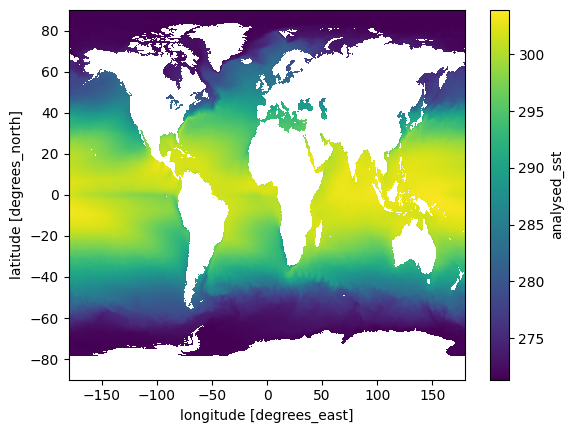

In [21]:
ds['analysed_sst'].plot();


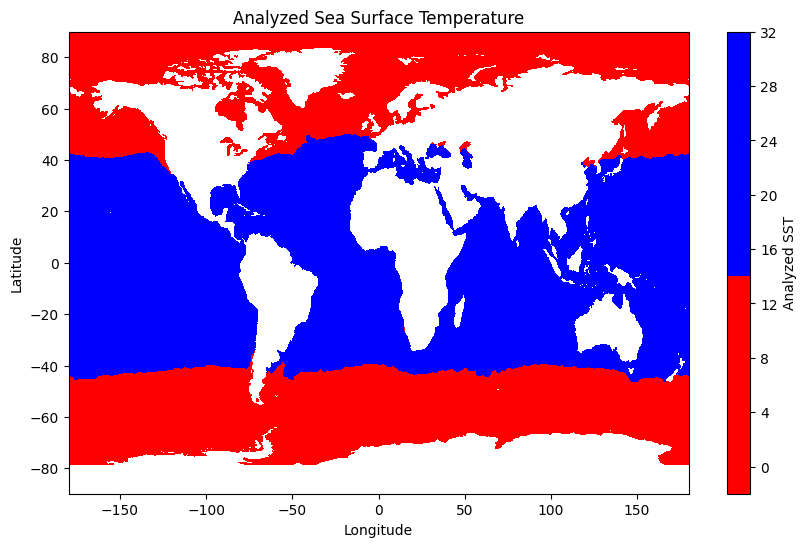

In [28]:
# Define the custom RGB colormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
colors = [(1, 0, 0), (0, 0, 1)]  # Red to Blue
cmap = ListedColormap(colors)

# Step 1: Create the contour plot
plt.figure(figsize=(10, 6))
plt.contourf(ds.lon,ds.lat,ds.analysed_sst-273.15, cmap=cmap, levels=20)  # Adjust levels for contour granularity
plt.colorbar(label='Analyzed SST')
plt.title('Analyzed Sea Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [34]:
# Orientation to Earthdata Cloud Access

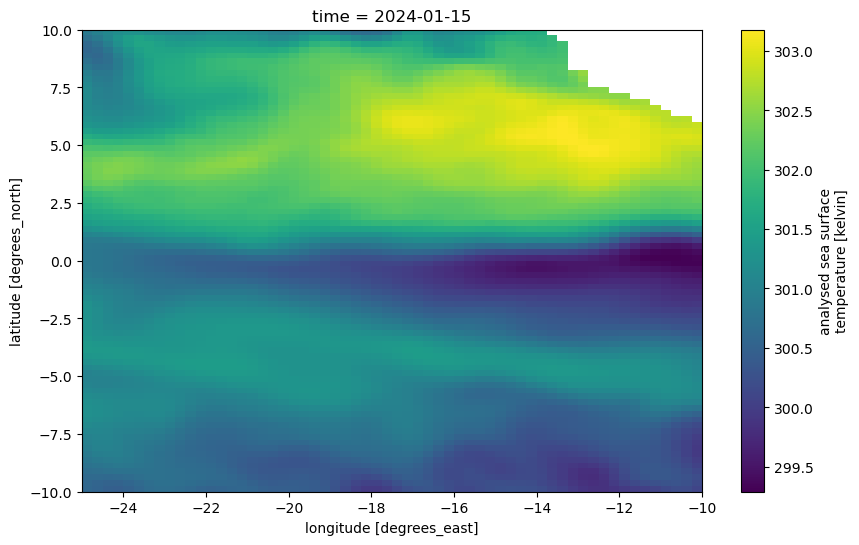

In [39]:
ds_subset = ds.sel(lat=slice(-10, 10), lon=slice(-25, -10)) 
ds_subset
ds_subset['analysed_sst'].plot(figsize=(10,6), x='lon', y='lat');



In [40]:
## Salinity

In [5]:
short_name1 = 'SMAP_JPL_L3_SSS_CAP_8DAY-RUNNINGMEAN_V5'
#short_name1 = 'SMAP_RSS_L3_SSS_SMI_8DAY-RUNNINGMEAN_V6'
#short_name1 = 'OISSS_L4_multimission_7day_v2'
#short_name1 = 'OISSS_L4_multimission_7day_v2'


results1 = earthaccess.search_data(
    short_name = short_name1,
    #count=3,
)
len(results1)

3734

In [6]:
min_lon, min_lat, max_lon, max_lat = -25, 10, -10, 30

date_range = ("2024-01-16", "2025-07-16")
# (xmin=-73.5, ymin=33.5, xmax=-43.5, ymax=43.5)
bbox = (-25, 10, -10, 30)

In [7]:
results1 = earthaccess.search_data(
    short_name = short_name1,
    cloud_hosted = True,
    temporal = date_range,
    bounding_box = bbox,
   # count=100
)
len(results1)

551

In [8]:
results1[0]


Collection: {'Version': '5.0', 'ShortName': 'SMAP_JPL_L3_SSS_CAP_8DAY-RUNNINGMEAN_V5'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-01-16T12:00:00.000Z', 'BeginningDateTime': '2024-01-08T12:00:00.000Z'}}
Size(MB): 10.945703506469727
Data: ['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SMAP_JPL_L3_SSS_CAP_8DAY-RUNNINGMEAN_V5/2024/008/SMAP_L3_SSS_20240112_8DAYS_V5.0.nc']

In [9]:
#ds1 = xr.open_dataset(fileset1[0])
fileset1 = earthaccess.open(results1[0:551])
ds1 = xr.open_mfdataset(fileset1[0:551])
ds1

QUEUEING TASKS | :   0%|          | 0/551 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/551 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/551 [00:00<?, ?it/s]

<xarray.Dataset> Size: 21GB
Dimensions:               (time: 551, latitude: 720, longitude: 1440)
Coordinates:
  * latitude              (latitude) float32 3kB 89.88 89.62 ... -89.62 -89.88
  * longitude             (longitude) float32 6kB -179.9 -179.6 ... 179.6 179.9
  * time                  (time) datetime64[ns] 4kB 2024-01-12T12:00:00 ... 2...
Data variables:
    smap_sss              (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    anc_sss               (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    anc_sst               (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    smap_spd              (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    smap_high_spd         (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    weight                (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    land_fraction         (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ice_fraction          (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    smap_sss_uncertainty  (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/40)
    title:                       SMAP 0.25x0.25 deg grid averaged 8-day SSS/WSPD
    institution:                 Jet Propulsion Laboratory
    source:                      SMAP L2B SSS
    history:                     DATA_SOURCE_VERSION V5.0 L2B SMAP SSS/WSPD
    comment:                     Gaussian-weighted map gridding of SMAP L2B S...
    Gaussian_window_radius:      45.0
    ...                          ...
    creator_name:                JPL
    creator_email:               fore@jpl.nasa.gov
    publisher_name:              Alexander G. Fore
    publisher_email:             fore@jpl.nasa.gov
    contributor_name:            Alexander Fore, Simon Yueh, Wenqing Tang, Ak...
    references:                  10.1109/TGRS.2016.2601486, 10.1109/TGRS.2016...

In [11]:
ds1

<xarray.Dataset> Size: 21GB
Dimensions:               (time: 551, latitude: 720, longitude: 1440)
Coordinates:
  * latitude              (latitude) float32 3kB 89.88 89.62 ... -89.62 -89.88
  * longitude             (longitude) float32 6kB -179.9 -179.6 ... 179.6 179.9
  * time                  (time) datetime64[ns] 4kB 2024-01-12T12:00:00 ... 2...
Data variables:
    smap_sss              (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    anc_sss               (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    anc_sst               (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    smap_spd              (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    smap_high_spd         (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    weight                (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    land_fraction         (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ice_fraction          (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    smap_sss_uncertainty  (time, latitude, longitude) float32 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/40)
    title:                       SMAP 0.25x0.25 deg grid averaged 8-day SSS/WSPD
    institution:                 Jet Propulsion Laboratory
    source:                      SMAP L2B SSS
    history:                     DATA_SOURCE_VERSION V5.0 L2B SMAP SSS/WSPD
    comment:                     Gaussian-weighted map gridding of SMAP L2B S...
    Gaussian_window_radius:      45.0
    ...                          ...
    creator_name:                JPL
    creator_email:               fore@jpl.nasa.gov
    publisher_name:              Alexander G. Fore
    publisher_email:             fore@jpl.nasa.gov
    contributor_name:            Alexander Fore, Simon Yueh, Wenqing Tang, Ak...
    references:                  10.1109/TGRS.2016.2601486, 10.1109/TGRS.2016...

In [13]:
ds1a=ds1.mean(dim="time")

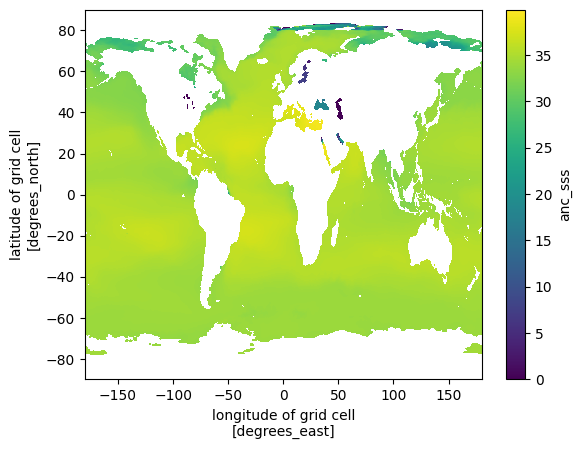

In [14]:
ds1a['anc_sss'].plot();


In [20]:
ds_subset1 = ds1a.sel(latitude=slice(-10, 10), longitude=slice(-25, -10)) 
ds_subset1
#ds_subset1['anc_sss'].plot(figsize=(10,6), x='longitude', y='latitude');

<xarray.Dataset> Size: 240B
Dimensions:               (latitude: 0, longitude: 60)
Coordinates:
  * latitude              (latitude) float32 0B 
  * longitude             (longitude) float32 240B -24.88 -24.62 ... -10.12
Data variables:
    smap_sss              (latitude, longitude) float32 0B dask.array<chunksize=(0, 60), meta=np.ndarray>
    anc_sss               (latitude, longitude) float32 0B dask.array<chunksize=(0, 60), meta=np.ndarray>
    anc_sst               (latitude, longitude) float32 0B dask.array<chunksize=(0, 60), meta=np.ndarray>
    smap_spd              (latitude, longitude) float32 0B dask.array<chunksize=(0, 60), meta=np.ndarray>
    smap_high_spd         (latitude, longitude) float32 0B dask.array<chunksize=(0, 60), meta=np.ndarray>
    weight                (latitude, longitude) float32 0B dask.array<chunksize=(0, 60), meta=np.ndarray>
    land_fraction         (latitude, longitude) float32 0B dask.array<chunksize=(0, 60), meta=np.ndarray>
    ice_fraction          (latitude, longitude) float32 0B dask.array<chunksize=(0, 60), meta=np.ndarray>
    smap_sss_uncertainty  (latitude, longitude) float32 0B dask.array<chunksize=(0, 60), meta=np.ndarray>

In [19]:
ds1a

<xarray.Dataset> Size: 37MB
Dimensions:               (latitude: 720, longitude: 1440)
Coordinates:
  * latitude              (latitude) float32 3kB 89.88 89.62 ... -89.62 -89.88
  * longitude             (longitude) float32 6kB -179.9 -179.6 ... 179.6 179.9
Data variables:
    smap_sss              (latitude, longitude) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    anc_sss               (latitude, longitude) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    anc_sst               (latitude, longitude) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    smap_spd              (latitude, longitude) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    smap_high_spd         (latitude, longitude) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    weight                (latitude, longitude) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    land_fraction         (latitude, longitude) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    ice_fraction          (latitude, longitude) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>
    smap_sss_uncertainty  (latitude, longitude) float32 4MB dask.array<chunksize=(720, 1440), meta=np.ndarray>

In [21]:
#chl
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC",
    count=1,
)
len(results)

1

In [32]:
tspan = ("2024-01-01", "2025-07-16")
#bbox = (-76.75, 36.97, -75.74, 39.01) #  lon lat, lon lat, Sout Easth , North West
clouds = (0, 50)
results2 = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC",
    temporal=tspan,
    bounding_box=bbox,
    cloud_cover=clouds,
    count=50,
)
len(results2)

2025-08-05 13:55:56 - earthaccess.api - INFO - Granules found: 219


50

In [ ]:
#ds1 = xr.open_dataset(fileset1[0])
fileset2 = earthaccess.open(results2[0:50])
ds2 = xr.open_mfdataset(fileset2[0:50])
ds2

In [16]:
paths = earthaccess.open(results2)

QUEUEING TASKS | :   0%|          | 0/22 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/22 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/22 [00:00<?, ?it/s]

In [17]:
paths

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240701T125616.L2.OC_BGC.V3_0.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240702T150915.L2.OC_BGC.V3_0.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240703T122718.L2.OC_BGC.V3_0.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240707T130740.L2.OC_BGC.V3_0.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240709T123834.L2.OC_BGC.V3_0.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240710T145131.L2.OC_BGC.V3_0.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240712T124410.L2.OC_BGC.V3_0.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240715T124945.L2.OC_BGC.V3_0.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240716T150240.L2.OC_BGC.V3_0.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240717T122040.L2.OC_BGC.

In [23]:
### DATA from Fish

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import requests

In [25]:
import geopandas as gpd
from shapely.geometry import box

# Define the bounding box coordinates (min_lon, min_lat, max_lon, max_lat)
min_lon, min_lat, max_lon, max_lat = -25, 10, -10, 30

# Create a bounding box geometry
bounding_box = box(min_lon, min_lat, max_lon, max_lat)

In [26]:
# Step 1: Load the region info
region_path = '~/proj_2025_sdm/contributors/fred/data/BoundingBox.shp'
extent_polygon = gpd.read_file(region_path)
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the downloaded shapefile (adjust the path to where you saved it)
world = gpd.read_file('~/proj_2025_sdm/contributors/fred/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')




In [ ]:
pip install pyobis

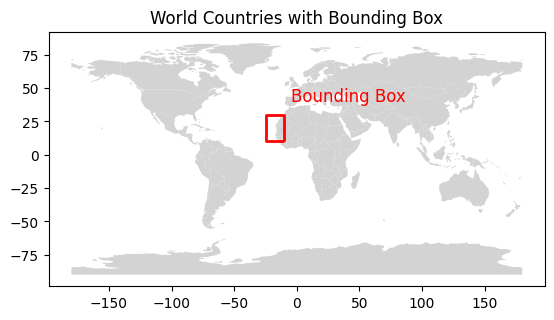

In [27]:
# Convert bounding box to GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bounding_box], crs=world.crs)

# Plot the data
fig, ax = plt.subplots()
world.plot(ax=ax, color='lightgrey')
bbox_gdf.plot(ax=ax, color='none', edgecolor='red', linewidth=2)  # Plot the bounding box

# Add title and annotations
plt.title('World Countries with Bounding Box')
plt.annotate('Bounding Box', xy=(-5, 40), fontsize=12, color='red')  # Adjust coordinates as needed
plt.show()

In [67]:
# do this once
!pip install git+https://github.com/PACEHackWeek/paceship




  Cloning https://github.com/PACEHackWeek/paceship to /tmp/pip-req-build-mqnx7aij
  Running command git clone --filter=blob:none --quiet https://github.com/PACEHackWeek/paceship /tmp/pip-req-build-mqnx7aij
  Resolved https://github.com/PACEHackWeek/paceship to commit 654814d8f168963b9d30e571a5e61cdf7fca80a3
doneuild dependencies ... 
done5h  Getting requirements to build wheel ... 
done5h  Preparing metadata (pyproject.toml) ... 


In [5]:
# make plot
import paceship

bbox = [-25, 10, -10, 30]
paceship.simple_bbox(bbox, projection='Robinson')

ModuleNotFoundError: No module named 'paceship.core'

In [28]:
# Step 3: Define turtle species
species = [
    "Sardinella aurita"
]



In [1]:
# Step 6: Get occurrence data from OBIS
import pyobis

def get_obis_data(species, geometry, startdate, enddate):
    occurrences = pyobis.occurrences.search(
        scientificname=species,
        geometry=geometry,
        fields=["id","scientificName", "decimalLatitude", "decimalLongitude", "eventDate"],
        startdate=startdate,
        enddate=enddate
    )
    return occurrences.execute()


In [2]:
# get seabird data
species = "Larus fuscus"
startdate = "2023-01-01"
enddate = "2025-12-31"
min_lon, min_lat, max_lon, max_lat = -25, 10, -10, 30
geometry_wkt = f'POLYGON(({min_lon} {min_lat}, {max_lon} {min_lat}, {max_lon} {max_lat}, {min_lon} {max_lat}, {min_lon} {min_lat}))'  # WKT for bounding box
data = get_obis_data(species, geometry_wkt, startdate, enddate)
data

2025-08-05 19:25:16 - pyobis.obisutils - INFO - 33715 to be fetched. Estimated time =0.8286710214614869140 seconds
2025-08-05 19:25:16 - pyobis.obisutils - INFO - Fetching: [█████████████████████████████.......................................................................] 10000/33715
2025-08-05 19:25:18 - pyobis.obisutils - INFO - Fetching: [███████████████████████████████████████████████████████████.........................................] 20000/33715
2025-08-05 19:25:22 - pyobis.obisutils - INFO - Fetching: [████████████████████████████████████████████████████████████████████████████████████████............] 30000/33715
2025-08-05 19:25:25 - pyobis.obisutils - INFO - Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 33715/33715
2025-08-05 19:25:27 - pyobis.obisutils - INFO - Fetched 33715 records.


,decimalLatitude,decimalLongitude,eventDate,scientificName,id
0,29.821079,-10.113170,2023-03-27T09:01:06Z,Larus fuscus,0002dd07-fe61-4a29-b88f-9ce61748e54f
1,27.094051,-13.419697,2023-01-30T23:00:26Z,Larus fuscus,0004807c-5f0a-448c-817b-5e0943406f31
2,23.645401,-15.988850,2023-01-10T02:01:44Z,Larus fuscus,00082d6c-079b-4b3e-b985-18009f1ef298
3,20.934246,-16.752016,2023-12-29T21:01:57Z,Larus fuscus,0008b3c6-f383-425c-aac1-0aaa2223f541
4,27.092781,-13.418043,2023-03-29T21:00:53Z,Larus fuscus,000cf7f0-cb46-4b52-b106-e4ebcca940d6
...,...,...,...,...,...
33710,29.271818,-10.271791,2023-12-02T14:03:43Z,Larus fuscus,fffb999d-4f50-43a7-9d37-678278574823
33711,27.937101,-12.324576,2023-08-26T03:01:52Z,Larus fuscus,fffc1e56-fadc-42dc-bef5-3dcf54e78623
33712,27.078747,-13.411431,2023-09-17T07:08:34Z,Larus fuscus,fffcb987-9b76-4846-bfb3-b2c79bd8b003
33713,23.672207,-15.960562,2023-01-14T22:01:45Z,Larus fuscus,fffddacc-cad8-48d0-9476-52f535882e9a


In [3]:
print(data)

       decimalLatitude  decimalLongitude             eventDate scientificName  \
0            29.821079        -10.113170  2023-03-27T09:01:06Z   Larus fuscus   
1            27.094051        -13.419697  2023-01-30T23:00:26Z   Larus fuscus   
2            23.645401        -15.988850  2023-01-10T02:01:44Z   Larus fuscus   
3            20.934246        -16.752016  2023-12-29T21:01:57Z   Larus fuscus   
4            27.092781        -13.418043  2023-03-29T21:00:53Z   Larus fuscus   
...                ...               ...                   ...            ...   
33710        29.271818        -10.271791  2023-12-02T14:03:43Z   Larus fuscus   
33711        27.937101        -12.324576  2023-08-26T03:01:52Z   Larus fuscus   
33712        27.078747        -13.411431  2023-09-17T07:08:34Z   Larus fuscus   
33713        23.672207        -15.960562  2023-01-14T22:01:45Z   Larus fuscus   
33714        20.917387        -17.039370  2023-02-01T18:00:22Z   Larus fuscus   

                           

In [37]:
# 3. Run `l2gen` with default configurations

In [8]:
import pandas as pd 
df = pd.DataFrame(data)
df

,decimalLatitude,decimalLongitude,eventDate,scientificName,id
0,29.821079,-10.113170,2023-03-27T09:01:06Z,Larus fuscus,0002dd07-fe61-4a29-b88f-9ce61748e54f
1,27.094051,-13.419697,2023-01-30T23:00:26Z,Larus fuscus,0004807c-5f0a-448c-817b-5e0943406f31
2,23.645401,-15.988850,2023-01-10T02:01:44Z,Larus fuscus,00082d6c-079b-4b3e-b985-18009f1ef298
3,20.934246,-16.752016,2023-12-29T21:01:57Z,Larus fuscus,0008b3c6-f383-425c-aac1-0aaa2223f541
4,27.092781,-13.418043,2023-03-29T21:00:53Z,Larus fuscus,000cf7f0-cb46-4b52-b106-e4ebcca940d6
...,...,...,...,...,...
33710,29.271818,-10.271791,2023-12-02T14:03:43Z,Larus fuscus,fffb999d-4f50-43a7-9d37-678278574823
33711,27.937101,-12.324576,2023-08-26T03:01:52Z,Larus fuscus,fffc1e56-fadc-42dc-bef5-3dcf54e78623
33712,27.078747,-13.411431,2023-09-17T07:08:34Z,Larus fuscus,fffcb987-9b76-4846-bfb3-b2c79bd8b003
33713,23.672207,-15.960562,2023-01-14T22:01:45Z,Larus fuscus,fffddacc-cad8-48d0-9476-52f535882e9a


In [7]:
df

,decimalLatitude,decimalLongitude,eventDate,scientificName,id
0,29.821079,-10.113170,2023-03-27T09:01:06Z,Larus fuscus,0002dd07-fe61-4a29-b88f-9ce61748e54f
1,27.094051,-13.419697,2023-01-30T23:00:26Z,Larus fuscus,0004807c-5f0a-448c-817b-5e0943406f31
2,23.645401,-15.988850,2023-01-10T02:01:44Z,Larus fuscus,00082d6c-079b-4b3e-b985-18009f1ef298
3,20.934246,-16.752016,2023-12-29T21:01:57Z,Larus fuscus,0008b3c6-f383-425c-aac1-0aaa2223f541
4,27.092781,-13.418043,2023-03-29T21:00:53Z,Larus fuscus,000cf7f0-cb46-4b52-b106-e4ebcca940d6
...,...,...,...,...,...
33710,29.271818,-10.271791,2023-12-02T14:03:43Z,Larus fuscus,fffb999d-4f50-43a7-9d37-678278574823
33711,27.937101,-12.324576,2023-08-26T03:01:52Z,Larus fuscus,fffc1e56-fadc-42dc-bef5-3dcf54e78623
33712,27.078747,-13.411431,2023-09-17T07:08:34Z,Larus fuscus,fffcb987-9b76-4846-bfb3-b2c79bd8b003
33713,23.672207,-15.960562,2023-01-14T22:01:45Z,Larus fuscus,fffddacc-cad8-48d0-9476-52f535882e9a
